### Chargement des bibliotheques

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 

### Chargement du data

In [4]:
# Charger les donnees
df = pd.read_csv("../data/data-recensement.csv")
df.head()

,Region,Departement,COM_ARRT_VILLE,COMMUNE,QUARTIER_VILLAGE_HAMEAU,CONCESSION,MENAGE,HOMMES,FEMMES,POPULATION
0,DAKAR,DAKAR,GOREE,GOREE,MBAMBARA,41,53,137,147,284
1,DAKAR,DAKAR,GOREE,GOREE,PONTY,57,95,340,361,701
2,DAKAR,DAKAR,GOREE,GOREE,TONGHOR,37,83,185,182,367
3,DAKAR,DAKAR,GOREE,GOREE,CASTEL,35,59,180,159,339
4,DAKAR,DAKAR,VILLE DE DAKAR,DAKAR PLATEAU,CITE CAP VERDIENNE,56,180,408,371,779


### Description des donnees 

In [5]:
# Verifier les types desdonnees
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25224 entries, 0 to 25223
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Region                   25224 non-null  object
 1   Departement              25224 non-null  object
 2   COM_ARRT_VILLE           25224 non-null  object
 3   COMMUNE                  25224 non-null  object
 4   QUARTIER_VILLAGE_HAMEAU  25224 non-null  object
 5   CONCESSION               25224 non-null  int64 
 6   MENAGE                   25224 non-null  int64 
 7   HOMMES                   25224 non-null  int64 
 8   FEMMES                   25224 non-null  int64 
 9   POPULATION               25224 non-null  int64 
dtypes: int64(5), object(5)
memory usage: 1.9+ MB
None


In [6]:
# Verifier les valeurs manquantes
print(df.isnull().sum())

Region                     0
Departement                0
COM_ARRT_VILLE             0
COMMUNE                    0
QUARTIER_VILLAGE_HAMEAU    0
CONCESSION                 0
MENAGE                     0
HOMMES                     0
FEMMES                     0
POPULATION                 0
dtype: int64


In [7]:
#Statistics descri
print(df.describe())

         CONCESSION        MENAGE        HOMMES        FEMMES     POPULATION
count  25224.000000  25224.000000  25224.000000  25224.000000   25224.000000
mean      56.212734     81.662504    363.895338    354.721456     718.616794
std      204.596737    259.822143   1158.618672   1178.790322    2334.954010
min        1.000000      1.000000      0.000000      0.000000       1.000000
25%        7.000000     10.000000     51.000000     48.000000     100.000000
50%       16.000000     22.000000    121.000000    115.000000     237.000000
75%       41.000000     57.000000    304.000000    298.000000     600.000000
max    11687.000000  12369.000000  69700.000000  70909.000000  140609.000000


In [8]:
# Verifier le nom des colonnes
print(df.columns)

Index(['Region', 'Departement', 'COM_ARRT_VILLE', 'COMMUNE',
       'QUARTIER_VILLAGE_HAMEAU', 'CONCESSION', 'MENAGE', 'HOMMES', 'FEMMES',
       'POPULATION'],
      dtype='object')


In [9]:
# Regrouper la population par région
df_region = df.groupby("Region")["POPULATION"].sum().reset_index()
df_region

,Region,POPULATION
0,DAKAR,4004425
1,DIOURBEL,2080332
2,FATICK,906922
3,KAFFRINE,820404
4,KAOLACK,1336718
5,KEDOUGOU,245147
6,KOLDA,914797
7,LOUGA,1125910
8,MATAM,831632
9,SAINT-LOUIS,1202438


In [10]:
# Trier les régions par population
df_region = df_region.sort_values(by="POPULATION", ascending=False)
df_region

,Region,POPULATION
0,DAKAR,4004425
12,THIES,2463679
1,DIOURBEL,2080332
4,KAOLACK,1336718
9,SAINT-LOUIS,1202438
7,LOUGA,1125910
11,TAMBACOUNDA,987154
6,KOLDA,914797
2,FATICK,906922
8,MATAM,831632


### Visualisation de la repartition de la population par region au Senegal

C:\Users\Mouha\AppData\Local\Temp\ipykernel_21072\4049330184.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_region, x = "POPULATION", y = "Region", palette= "Blues_r")


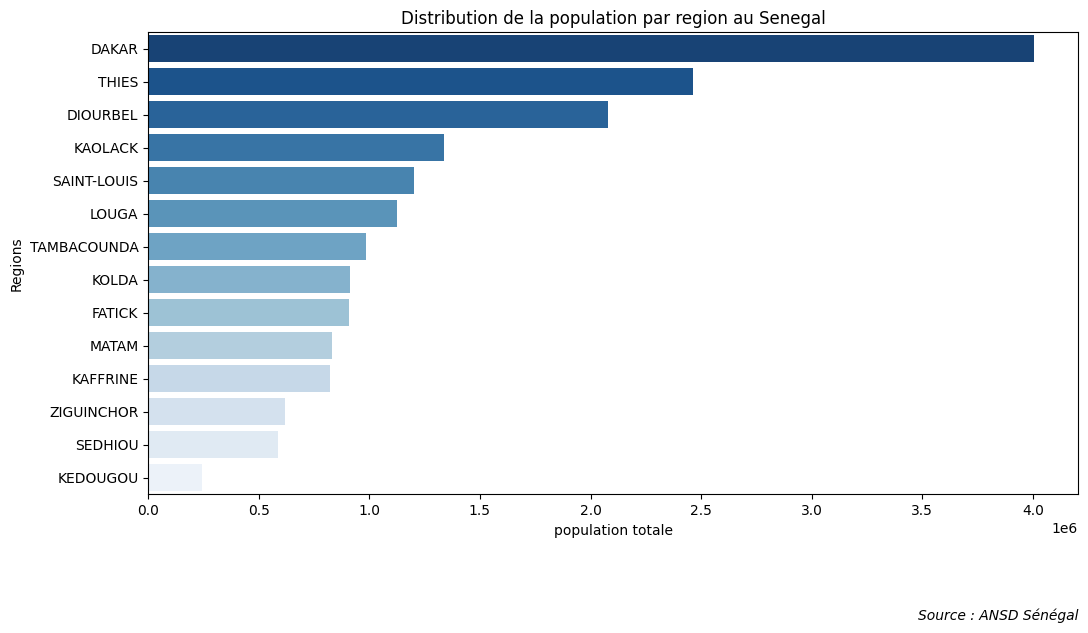

In [11]:
# Visualisation
plt.figure(figsize = (12, 6))
sns.barplot(data = df_region, x = "POPULATION", y = "Region", palette= "Blues_r")
plt.xlabel("population totale")
plt.ylabel("Regions")
plt.title("Distribution de la population par region au Senegal")
# Ajouter la source en bas du graphique
plt.figtext(0.9, -0.1, "Source : ANSD Sénégal", ha="right", fontsize=10, style="italic")

plt.show()


In [12]:
df_sexe = df.groupby("Region")[["HOMMES", 'FEMMES']].sum().reset_index()
df_sexe

,Region,HOMMES,FEMMES
0,DAKAR,2018759,1985666
1,DIOURBEL,1029751,1050581
2,FATICK,453865,453057
3,KAFFRINE,415883,404521
4,KAOLACK,674910,661808
5,KEDOUGOU,132257,112890
6,KOLDA,467910,446887
7,LOUGA,563945,561965
8,MATAM,428109,403523
9,SAINT-LOUIS,610884,591554


### Visualisation de la répartition des hommes et des femmes par région

<Figure size 600x1200 with 0 Axes>

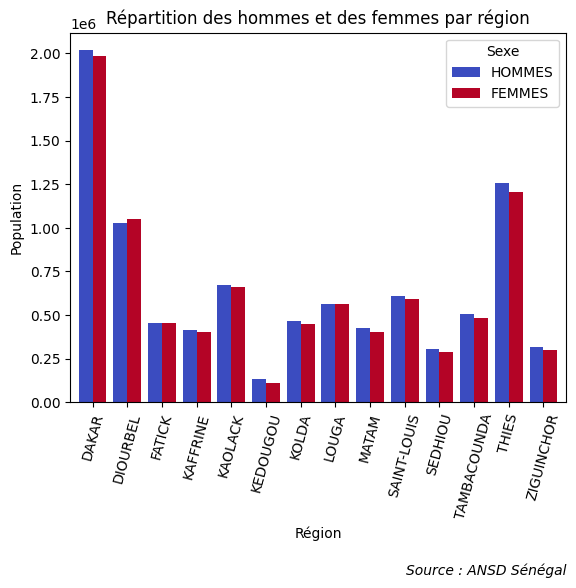

In [13]:
# Création du graphique
plt.figure(figsize=(6, 12))
df_sexe.set_index("Region").plot(kind="bar", stacked=False, colormap="coolwarm", width=0.8)


# Ajouter un titre et des labels
plt.xlabel("Région")
plt.ylabel("Population")
plt.title("Répartition des hommes et des femmes par région")
plt.xticks(rotation=75)  
plt.legend(title="Sexe")

# Ajout de la source en bas du graphique
plt.figtext(0.9, -0.25, "Source : ANSD Sénégal", ha="right", fontsize=10, style="italic")


# Afficher le graphique
plt.show()

In [27]:
df_menage = df.groupby("Region")[["MENAGE"]].sum().reset_index()
df_menage

,Region,MENAGE
0,DAKAR,634999
1,DIOURBEL,197130
2,FATICK,88454
3,KAFFRINE,72654
4,KAOLACK,124298
5,KEDOUGOU,31558
6,KOLDA,86541
7,LOUGA,121186
8,MATAM,71971
9,SAINT-LOUIS,139550


### Visualisation de la repartition des menages par region

C:\Users\Mouha\AppData\Local\Temp\ipykernel_21072\2777122255.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_menage, x = "Region", y = "MENAGE", palette= "coolwarm")


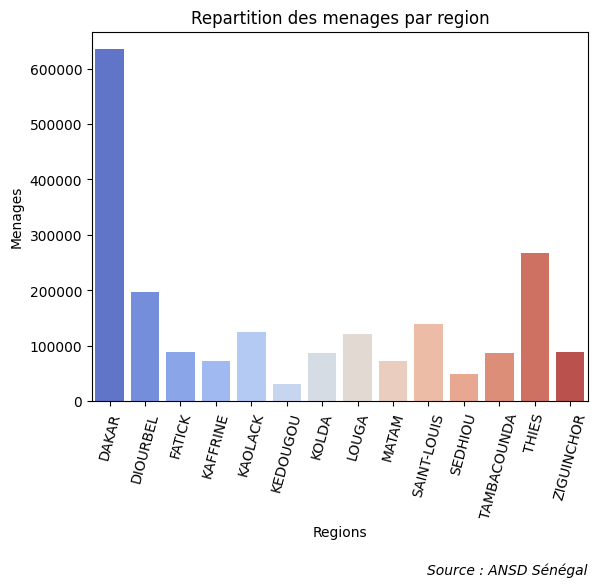

In [33]:
plt.Figure(figsize = (14, 7))
sns.barplot(data = df_menage, x = "Region", y = "MENAGE", palette= "coolwarm")


plt.xlabel("Regions")
plt.ylabel("Menages")
plt.title("Repartition des menages par region")
plt.xticks(rotation = 75)


plt.figtext(0.9, -0.25, "Source : ANSD Sénégal", ha="right", fontsize=10, style="italic")

plt.show()

### Visualisation de la repartition des menages et de la population par region

C:\Users\Mouha\AppData\Local\Temp\ipykernel_21072\2991839969.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data = df_menage, x = "Region", y = "MENAGE", palette= "coolwarm", width=0.8, ax= axes[1])


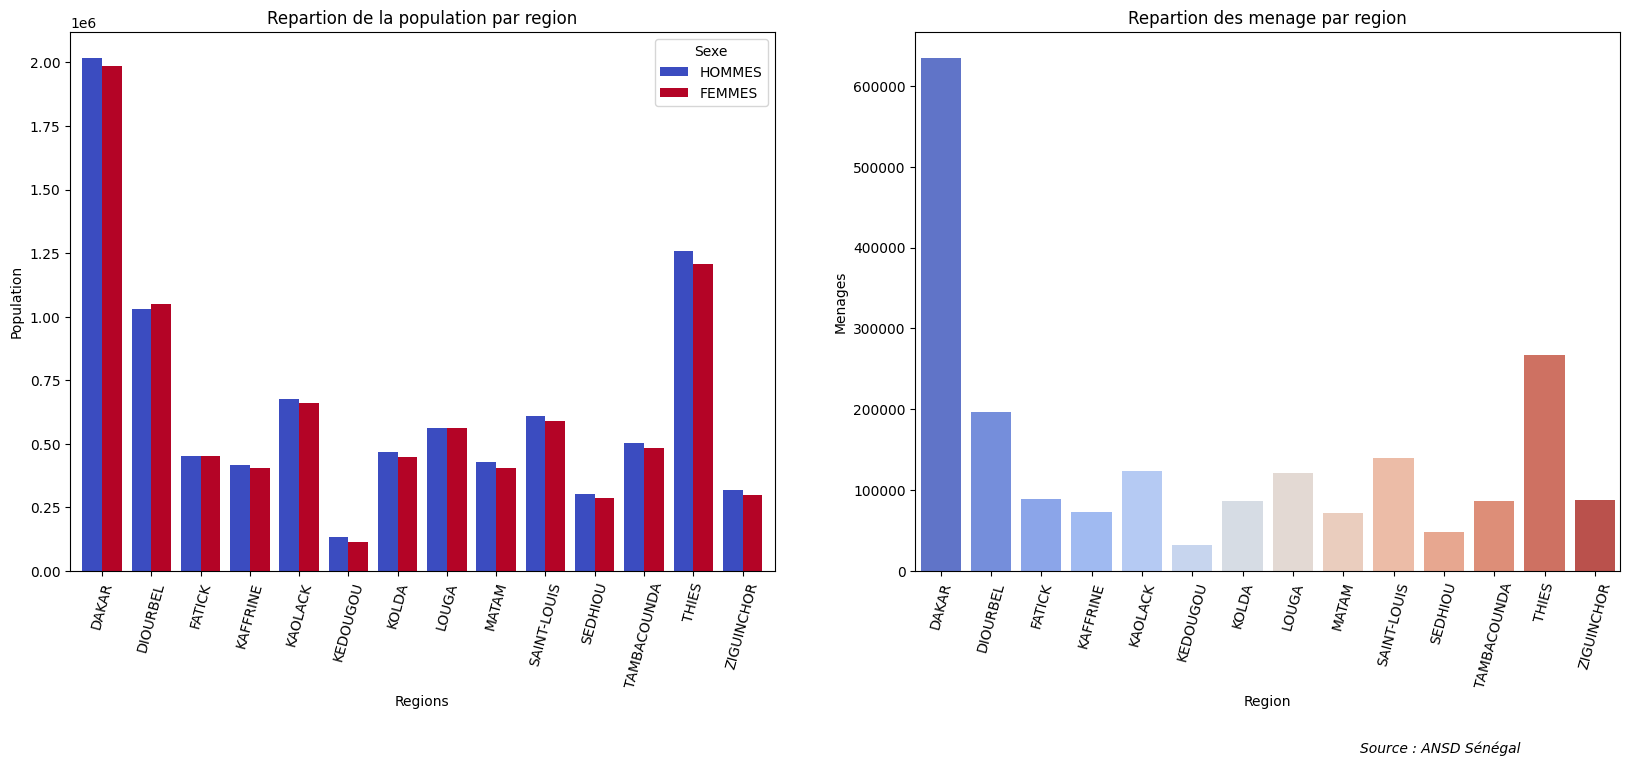

In [ ]:
# Créer la figure avec deux sous-graphiques

fig, axes = plt.subplots(1,2, figsize = (20,7))

# Premier graphique: Repartion de la population par region
df_sexe.set_index("Region").plot(kind="bar", stacked=False, colormap="coolwarm", width=0.8, ax=axes[0])

axes[0].set_xlabel("Regions")
axes[0].set_ylabel("Population")
axes[0].set_title("Repartion de la population par region")
axes[0].tick_params(axis = "x", rotation = 75)
axes[0].legend(title = "Sexe")


# Deuxieme graphique: Repartion des menaged par region
sns.barplot(data = df_menage, x = "Region", y = "MENAGE", palette= "coolwarm", width=0.8, ax= axes[1])

axes[1].set_xlabel("Regions")
axes[1].set_ylabel("Menages")
axes[1].set_title("Repartion des menage par region")
axes[1].tick_params(axis = "x", rotation = 75)

# Ajouter une source commune en bas
fig.text(0.85, -0.15, "Source : ANSD Sénégal", ha="right", fontsize=10, style="italic")

plt.show()


In [54]:
df_evolution_menage_concession = df.groupby("Region")[["CONCESSION","MENAGE"]].sum().reset_index()
df_evolution_menage_concession

,Region,CONCESSION,MENAGE
0,DAKAR,327103,634999
1,DIOURBEL,169498,197130
2,FATICK,65086,88454
3,KAFFRINE,56914,72654
4,KAOLACK,97040,124298
5,KEDOUGOU,24778,31558
6,KOLDA,69441,86541
7,LOUGA,92588,121186
8,MATAM,47684,71971
9,SAINT-LOUIS,102691,139550


### Evolution des menages et concessions par region

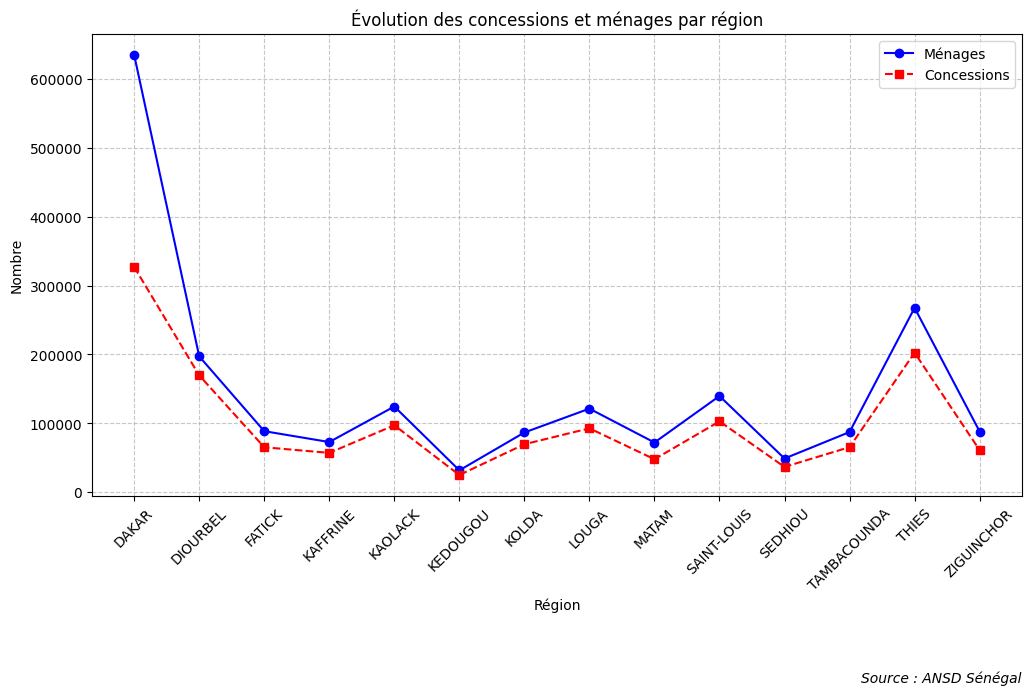

In [63]:
# Création de la figure
plt.figure(figsize=(12, 6))

# Tracer la courbe des ménages
plt.plot(df_evolution_menage_concession["Region"], df_evolution_menage_concession["MENAGE"], marker="o", linestyle="-", color="b", label="Ménages")

# Tracer la courbe des concessions
plt.plot(df_evolution_menage_concession["Region"], df_evolution_menage_concession["CONCESSION"], marker="s", linestyle="--", color="r", label="Concessions")

# Personnalisation du graphique
plt.xlabel("Région")
plt.ylabel("Nombre")
plt.title("Évolution des concessions et ménages par région")
plt.xticks(rotation=45)  # Rotation des noms de région pour lisibilité
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)


# Ajouter une source
plt.figtext(0.9, -0.2, "Source : ANSD Sénégal", ha="right", fontsize=10, style="italic")

# Affichage du graphique
plt.show()